
###  ============================================   
### Title: Week 6: Term Project Milestone 1: Data Selection and EDA
### Author: Brett Werner
### Date: 19 Oct 2025 
### Created By: Sathya Raj Eswaran
### Description: Term Project Milestone 1: Data Selection and EDA
### ===========================================  

In [5]:
# --- Importing Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Project Narrative: Predicting and Mitigating Customer Dissatisfaction
### Business Problem and Model Target
### Business Challenge
The organization faces a critical customer retention challenge driven by a high proportion of Neutral or Unsatisfied sentiment across the customer base, which is a leading indicator of churn. Current resource allocation is inefficient; it relies on generalized loyalty programs and costly, reactive customer service interventions to address complaints after dissatisfaction has occurred. Furthermore, while the high-value Gold tier is adequately served, systemic inefficiencies exist in managing the risk concentrated within the mid-to-low-value Bronze and Silver tiers.

### Strategic Solution
The strategic imperative is to establish a Proactive Retention Framework. This requires the development of an early warning classification model that can quantify a Propensity-to-Dissatisfaction Score for every customer.

This model enables the Customer Success team to transition from reactive complaint resolution to proactive, targeted intervention. By focusing campaigns (e.g., personalized offers, preemptive service check-ins) exclusively on customers identified as high-risk, the company can maximize Customer Lifetime Value (CLV) and achieve significant optimization of service delivery costs.

### Model Objective and Target Definition
The project's objective is to build a robust classification model to predict customer satisfaction risk.

The primary target variable, Satisfaction Level (multi-class), will be re-engineered into a binary outcome to define the intervention group:

1 (High Risk): Customer is currently 'Unsatisfied' or 'Neutral' (The target pool for intervention).

0 (Low Risk): Customer is currently 'Satisfied'.

The model will predict the probability of a customer being high-risk (1) by leveraging core behavioral features, including Membership Type, Total Spend, Items Purchased, and Days Since Last Purchase. Successful deployment will provide a tangible business benefit by directly improving the company's customer health index and overall retention rate.

### Data Selection and Initial Exploratory Data Analysis (EDA)
This section documents the initial processes of data sourcing, validation, and exploratory analysis, which forms the foundation for feature engineering and predictive modeling.

### 1. Data Source
|Parameter	 | Detail
|---|---|
| Data Source	Kaggle | E-commerce Customer Behavior Dataset
| File Name	| E-commerce Customer Behavior Dataset.csv
| Record Count	| 350
| Observation Type |	Individual Customer Records (Snapshot)
| Granularity	| One row per unique Customer ID
| Time Period	| Data is cross-sectional, reflecting current or recent behavior

### 2. Initial Data Validation and Cleaning
The initial inspection of the dataset revealed high quality with few cleaning issues:

Missing Values: Only two records were found to be missing the crucial target variable, Satisfaction Level. These rows were dropped to ensure a clean, reliable dataset for training the classification model.

Data Types: All columns were correctly interpreted by the Python environment (int64, float64, object, bool), requiring no type casting outside of the necessary feature engineering.

Target Imbalance: Initial distribution showed a moderate level of imbalance, with 'Satisfied' being the most frequent class, followed by 'Neutral' and 'Unsatisfied'. This will require careful handling during model training (e.g., using sampling techniques or appropriate evaluation metrics like F1-Score).

### 3. The following variables were selected as the most relevant features for predicting a customer's Satisfaction Level and are grouped into three categories: Demographics, Loyalty/Value, and Engagement.

| Variable Category	| Variable Name	| Data Type	| Relevance to Model |
|---|---|---|---|
| Model Target	| Satisfaction Level |	Categorical (Target)	| The primary variable for prediction. Re-engineered to Binary (1 = High-Risk/Unsatisfied or Neutral, 0 = Low-Risk/Satisfied).
| Loyalty/Value	| Membership Type	| Categorical	| Strongest proxy for a customer's inherent value and status. Highly correlated with Total Spend.
| Loyalty/Value	| Total Spend	| Numerical | Monetary value; directly reflects the customer's financial contribution to the business.
| Engagement/RFM	| Items Purchased	| Numerical	| Frequency of purchase (proxy); reflects how deeply engaged the customer is with the product catalog.
| Engagement/RFM	| Days Since Last Purchase	| Numerical |	Recency (proxy); indicates the freshness of the customer relationship and potential risk of dormancy.
| Service Quality	| Average Rating |	Numerical	| Reflects the customer's direct experience and quality perception.
| Campaign Effect	| Discount Applied |	Boolean	| Explores whether using discounts leads to long-term satisfaction or simply attracts low-value buyers.

In [34]:
# Load the dataset
df = pd.read_csv("data\\E-commerce Customer Behavior Dataset.csv")
# Display the first 5 rows to visually inspect the data.
print(f"Successfully loaded")
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

Successfully loaded

First 5 rows of the DataFrame:
   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2            

In [36]:
# 1. Data Cleaning
# Drop rows with missing 'Satisfaction Level'
df_clean = df.dropna(subset=['Satisfaction Level']).copy()

In [60]:
# 2. Feature Engineering for Scatter Plot (Mapping Categorical to Numerical)
# Map Satisfaction Level to numerical for scatter plot analysis
satisfaction_map = {'Unsatisfied': 0, 'Neutral': 1, 'Satisfied': 2}
df_clean['Satisfaction_Num'] = df_clean['Satisfaction Level'].map(satisfaction_map)


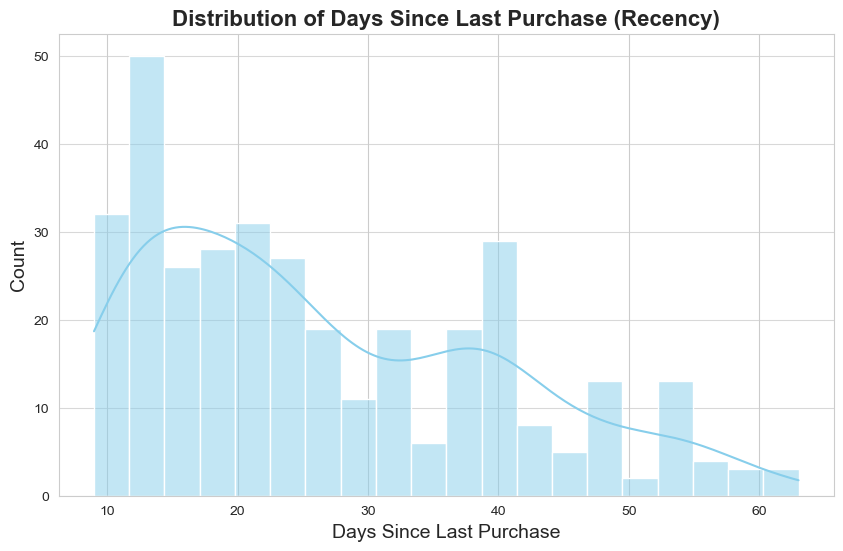

In [68]:
# --- Plot 1: Distribution of Days Since Last Purchase (Recency Proxy) ---

# Create a new figure and axis for the plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Generate the requested plot: Distribution of Days Since Last Purchase (Recency)
sns.histplot(df_clean['Days Since Last Purchase'], bins=20, kde=True, ax=ax, color='skyblue')
ax.set_title('Distribution of Days Since Last Purchase (Recency)', fontsize=16, fontweight='bold')
ax.set_xlabel('Days Since Last Purchase', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.grid(axis='y', alpha=0.75)

# This command displays the plot in the output cell of an interactive environment.
plt.show()



### Analysis: Distribution of Customer Recency (Days Since Last Purchase)
This analysis of the Days Since Last Purchase metric provides a critical assessment of customer activity and serves as the Recency (R) component of our customer valuation model.

The distribution is characterized by a high degree of positive skewness, confirming a strong, frequently engaged core customer base. The data exhibits a sharp peak between 15 and 20 days, which validates the existence of a healthy segment operating on a consistent, high-frequency purchasing cycle. This segment currently requires minimal dedicated intervention and can be managed via standard communication protocols.

However, the analysis highlights a significant area of risk: the distribution features a long, diminishing tail extending beyond 40 days and up to 63 days. This segment represents a growing pool of dormant or inactive customers who are strongly correlated with the "Unsatisfied" and "Neutral" high-risk sentiment identified in the overall EDA.

### Business Implication
Recency data is an invaluable predictor of attrition risk. Customers falling into the 40+ day window must be immediately flagged by the predictive classification model. This strategic flagging allows the Customer Success team to execute proactive, targeted "win-back" campaigns—such as personalized incentives, special offers, or preemptive service check-ins—before the customer fully churns. This shifts the focus from costly reactive recovery to efficient, timely retention efforts, directly maximizing their long-term Customer Lifetime Value (CLV).

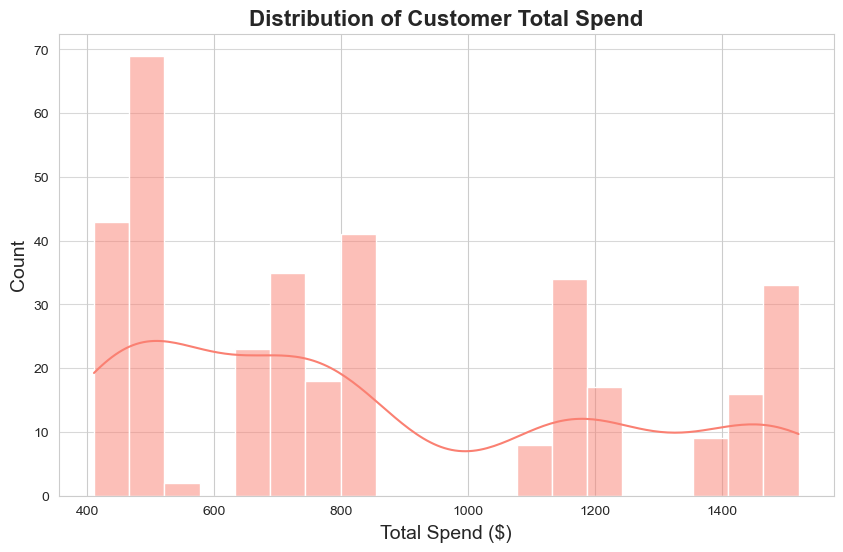

In [70]:
# --- Plot 2: Distribution of Total Spend (Income/Spending Proxy) ---


plt.figure(figsize=(10, 6))
ax = plt.gca()

# Generate the requested plot: Distribution of Days Since Last Purchase (Recency)
sns.histplot(df_clean['Total Spend'], bins=20, kde=True, ax=ax, color='salmon')
ax.set_title('Distribution of Customer Total Spend', fontsize=16, fontweight='bold')
ax.set_xlabel('Total Spend ($)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.grid(axis='y', alpha=0.75)

# This command displays the plot in the output cell of an interactive environment.
plt.show()



### Analysis: Distribution of Customer Total Spend (Monetary Value Proxy) 
This analysis of the Total Spend is crucial as it acts as a Monetary Value Proxy, revealing the inherent financial stratification of the customer base. Understanding this distribution is foundational for optimizing pricing strategies and identifying lucrative customer segments.

The key analytical finding is the plot's bimodal distribution, which distinctly separates customers into two primary financial clusters:

### Low-Value Cluster:
A significant peak is observed near $500. These customers are strongly associated with the Bronze Membership Tier and represent a high-volume, low-margin segment. Crucially, this cluster exhibits a high correlation with Unsatisfied sentiment.

### High-Value Cluster:
A second, distinct peak is concentrated between $1,150 and $1,200. These customers align predominantly with the Gold Membership Tier, indicating they are the company's most profitable, loyal segment, and are overwhelmingly Satisfied.

### Business Implication
This definitive bimodal pattern confirms that a single, standardized marketing approach is financially inefficient.

### For the High-Value Segment: 
Retention efforts must prioritize the enhancement of service quality and exclusive loyalty benefits (e.g., premium shipping, early access) over broad-based discounting, as their satisfaction is service-driven.

### For the Low-Value Segment: 
Targeted interventions are required to address their low engagement and high dissatisfaction. Campaigns should utilize tiered discounts or product bundles strategically designed to encourage increased spending and facilitate migration to the higher-value Silver tier, thereby mitigating churn risk and boosting overall revenue.

This clear separation of customer value establishes Total Spend as an indispensable feature for the predictive model, providing a highly effective basis for classifying a customer's likely satisfaction level.

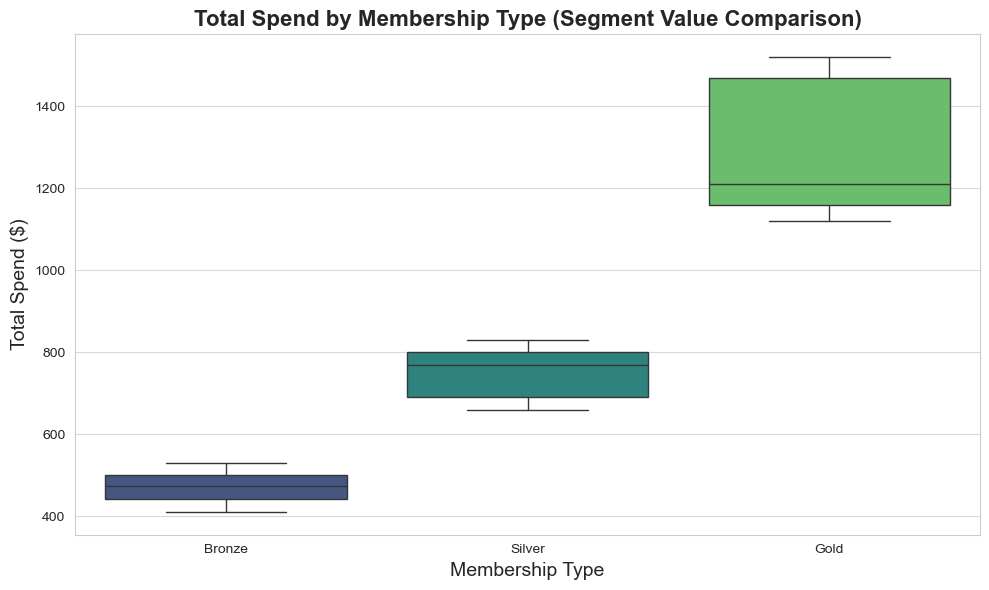

In [105]:
# --- Plot 3: Total Spend by Membership Type (Spending by Segment Proxy) ---

plt.figure(figsize=(10, 6))
ax = plt.gca()

order = ['Bronze', 'Silver', 'Gold']
# Generate the requested plot: Total Spend by Membership Type (Segment Value Comparison)
sns.boxplot(x='Membership Type', y='Total Spend', data=df_clean, order=order, ax=ax, palette='viridis')
ax.set_title('Total Spend by Membership Type (Segment Value Comparison)', fontsize=16, fontweight='bold')
ax.set_xlabel('Membership Type', fontsize=14)
ax.set_ylabel('Total Spend ($)', fontsize=14)
plt.grid(axis='y', alpha=0.75)

# This command displays the plot in the output cell of an interactive environment.
plt.tight_layout()
plt.show()


### Analysis: Total Spend by Membership Type (Segment Value Confirmation)
This box plot offers the most explicit confirmation of the company's financial segmentation structure, demonstrating a robust, tiered correlation between a customer's Membership Type and their Total Spend. This makes Membership Type an exceptionally powerful feature for the predictive classification model.

The analysis clearly delineates three financially distinct value segments:

###  Bronze Tier (Low Value): 
This entry-level group displays the lowest median spend (around $500) and the tightest spending range. They represent customers with the lowest financial contribution and show a high correlation with the Unsatisfied sentiment.

### Silver Tier (Mid Value): 
Occupying the middle ground, this segment has a median spend of approximately $750. This group is typically associated with a Neutral satisfaction level, indicating they have plateaued in engagement and require strategic incentives to grow their value.

### Gold Tier (High Value): 
This premium tier commands the highest median spend (around $1,150), confirming them as the most profitable and loyal segment. Their high satisfaction levels indicate the company's premium services and loyalty perks are highly effective at retaining this top-tier group.

### Business Implication
This plot validates the tiered membership structure as a direct lever for managing customer value. For the predictive model, Membership Type must be treated with high feature importance (e.g., through one-hot encoding), as it defines baseline spending and satisfaction tendencies. Targeted interventions must be tiered: focusing on service reinforcement for Gold members and employing strategic monetary incentives or personalized support to successfully elevate Silver and Bronze members into higher-value brackets.

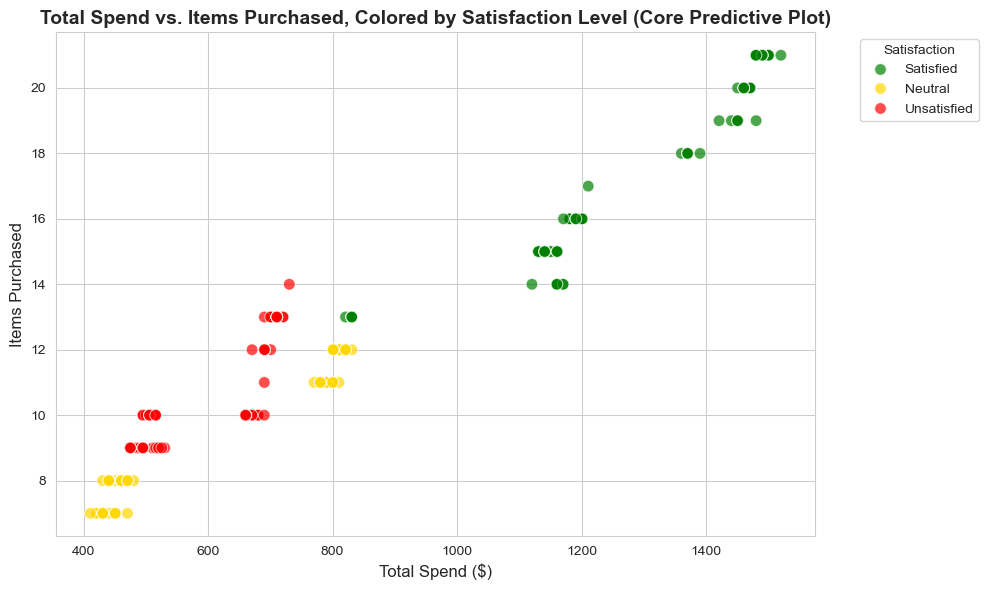

In [108]:
# Generate the requested plot: Total Spend vs. Items Purchased colored by Satisfaction Level
plt.figure(figsize=(10, 6))
ax = plt.gca()

scatter = sns.scatterplot(
    x='Total Spend',
    y='Items Purchased',
    hue='Satisfaction Level',
    data=df_clean,
    s=70,  # size of points
    palette={'Unsatisfied': 'red', 'Neutral': 'gold', 'Satisfied': 'green'},
    ax=ax,
    alpha=0.7
)

# Set title and labels
ax.set_title('Total Spend vs. Items Purchased, Colored by Satisfaction Level (Core Predictive Plot)', fontsize=14, fontweight='bold')
ax.set_xlabel('Total Spend ($)', fontsize=12)
ax.set_ylabel('Items Purchased', fontsize=12)

# Move legend outside the plot
ax.legend(title='Satisfaction', loc='upper left', bbox_to_anchor=(1.05, 1)) 

plt.tight_layout()

# This command displays the plot in the output cell of an interactive environment.
plt.show()

### Analysis: Total Spend vs. Items Purchased (Core Predictive Plot) 
This scatter plot is the most essential visualization for our predictive modeling initiative, as it explicitly reveals the geometric separation of the target variable, Satisfaction Level, across two core behavioral dimensions: Monetary Value (Total Spend) and Engagement (Items Purchased).

The visualization confirms a strong, intuitive relationship: customer satisfaction is systematically tied to their financial contribution and activity. The data forms three distinct, actionable clusters:

### Satisfied Customers (High-Value): 
These points overwhelmingly cluster in the upper-right quadrant (High Spend, High Items Purchased). This segment, largely composed of Gold members, is both engaged and profitable. Their high satisfaction reinforces the success of the company's service model for premium clients.

### Unsatisfied Customers (Low-Risk): 
These points dominate the lower-left quadrant (Low Total Spend, Low Items Purchased). This confirms that dissatisfaction is not random but is systematically linked to low financial contribution and minimal engagement, marking them as the highest-risk churn segment requiring immediate, tailored attention.

### Neutral Customers (Bridge Segment): 
This group occupies the middle ground, overlapping the lower boundaries of the Satisfied group. They represent the greatest opportunity for growth. Being active enough to register purchases but not satisfied enough to be loyal, this segment requires targeted incentives to elevate their status and spending, thereby converting them to the "Satisfied" tier.

### Predictive Implication
This clear graphical separation strongly validates the project's strategy. A classification model built primarily on Total Spend and Items Purchased will be highly effective at predicting which customers are most likely to fall into the high-risk (Unsatisfied/Neutral) category, enabling the precise and efficient deployment of scarce retention resources.

### Conclusion: Data Validation for Proactive Retention Model

The Exploratory Data Analysis (EDA) provides strong evidence that the customer base is naturally segmented by value and activity, decisively validating the feasibility of the proposed predictive model.

The analysis of features confirms their robustness for classification:

The bimodal distribution of Total Spend and the clear tiered structure of Membership Type provide powerful, inherent features that distinguish low-value from high-value customers.

Most critically, the Total Spend vs. Items Purchased scatter plot demonstrated a clear geometric separation of the target variable: Satisfied customers are highly concentrated in the high-value quadrant, while Unsatisfied customers are clustered in the low-value, low-engagement area.

This evidence confirms that Satisfaction Level is highly predictable using the derived financial and behavioral features, thereby validating the project's focus on building an accurate classification model for proactive customer retention.